#  libraries

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Iris.csv')

In [11]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# separating the data that we will work with

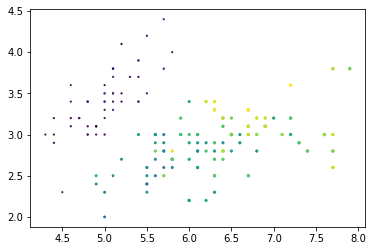

In [36]:
plt.scatter(df["SepalLengthCm"],df["SepalWidthCm"] ,df["PetalLengthCm"] ,df["PetalWidthCm"])

In [45]:
data=df.iloc[:, 1:3]
data

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


# The elbow graph

D:\data analysis\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


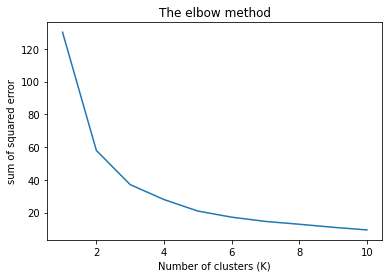

In [48]:
k_range=range(1,11)
sse = []

for k in k_range:
    kmeans = KMeans(n_clusters = k, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)
    
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(k_range, sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('sum of squared error') # Within cluster sum of squares
plt.show()

# the optimal number for clusters is 3

In [55]:
km=KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_predict=km.fit_predict(data)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [56]:
data['cluster']=y_predict

data

,SepalLengthCm,SepalWidthCm,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,2
147,6.5,3.0,1
148,6.2,3.4,1


# ploting the predicted clusters

In [57]:
km.cluster_centers_

array([[ 5.00600000e+00,  3.41800000e+00,  1.00000000e+00],
       [ 6.81276596e+00,  3.07446809e+00,  2.00000000e+00],
       [ 5.77358491e+00,  2.69245283e+00, -6.66133815e-16]])

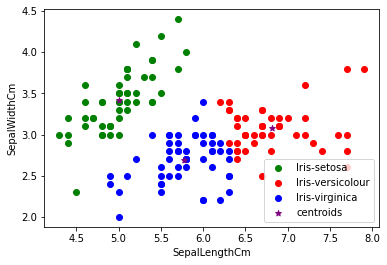

In [64]:
data1=data[data.cluster==0]
data2=data[data.cluster==1]
data3=data[data.cluster==2]


plt.scatter(data1['SepalLengthCm'],data1['SepalWidthCm'],color="green", label = 'Iris-setosa')
plt.scatter(data2['SepalLengthCm'],data2['SepalWidthCm'],color="red",label = 'Iris-versicolour')
plt.scatter(data3['SepalLengthCm'],data3['SepalWidthCm'],color="blue",label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroids")
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.legend()
